<a href="https://colab.research.google.com/github/brookskeehley/STAT-7220-Applied-Experimental-Design/blob/main/dogtoyspractice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**DOG TOY PRACTICE EXAMPLE (WEEK 2)**

In [3]:
# === COURSE REPO SETUP === #

# 1. ENTER your GitHub username (the one that owns your fork)
github_username = "brookskeehley"

# 2. Name of the repo (don't change unless your fork name is different)
repo_name = "STAT-7220-Applied-Experimental-Design"

# 3. Build the full repo URL for cloning
repo_url = f"https://github.com/{github_username}/{repo_name}.git"

import os

# --- Detect if we're already in a repo ---
cwd = os.getcwd()
if cwd.endswith(repo_name):
    print(f"✅ Already inside repo folder: {cwd}")
else:
    # --- If the repo folder exists, check if it's nested ---
    if os.path.exists(repo_name):
        print(f"⚠️ Found existing folder '{repo_name}'. Skipping clone to avoid nesting.")
    else:
        print(f"📥 Cloning repo from {repo_url}...")
        os.system(f"git clone {repo_url}")

    # --- Change to repo directory ---
    if os.path.exists(repo_name):
        os.chdir(repo_name)
        print(f"📂 Changed directory to: {os.getcwd()}")
    else:
        print("❌ ERROR: Repo folder not found. Please check your GitHub username.")

# --- Check if this is the instructor's repo instead of student's fork ---
# This command needs to be run from within the repository directory
remote_url = os.popen("git config --get remote.origin.url").read().strip()

if "abrown9008" in remote_url:
    print("⚠️ WARNING: You are working in the instructor's repo, not your fork!")
    print("💡 Please fork the repo to your own account and update `github_username` above.")
else:
    print(f"🔗 Connected to fork at: {remote_url}")

# Set Today's Directory #

today_dir = "Comparative Experiments"
os.chdir(today_dir)
print(f"📂 Changed directory to: {os.getcwd()}")

📥 Cloning repo from https://github.com/brookskeehley/STAT-7220-Applied-Experimental-Design.git...
📂 Changed directory to: /content/STAT-7220-Applied-Experimental-Design
🔗 Connected to fork at: https://github.com/brookskeehley/STAT-7220-Applied-Experimental-Design.git
📂 Changed directory to: /content/STAT-7220-Applied-Experimental-Design/Comparative Experiments


Let's say we work for a dog toy manufacturing company. We want to manufacture rubber tennis balls for dogs to be able to play with and chew on that are designed to last. As you may know, some dogs who are of certain breeds and/or are aggressive chewers can break toys very easily. We want to avoid that as much as possible with our rubber tennis balls. Our engineers have come up with two different formulations of hard rubber that can be used to manufacture these balls. Let's denote these as Formula 1 and Formula 2.

To decide which formulation to use, we want to perform a pressure test to simulate the pressure these rubber tennis balls might experience being clamped down on by a dog's jaw. We test 60 balls of each formulation by putting them each under a hydraulic press and recording the amount of pressure exerted (in PSI) when the ball rips.

The data for this experiment are contained in the "Dog Toys.xlsx" file.

With these data, I want you to create a .ipynb file where you answer the following questions (check the answer key in the Dog Toys Example notebook!):

1. Specify the outcome and independent variables. What lurking variables might be present?
2. Briefly explain why a completely randomized design might be appropriate in this context
3. Perform an appropriate exploratory analysis
4. Perform an appropriate inferential analysis (including the specification of  H0  and  H1 )
5. Provide contextual conclusions -- which formulation seems more durable?
6. What questions remain?

# 1. Specify the outcome and independent variables. What lurking variables might be present?

Answer: The outcome of this experiement is the maximum PSI of each ball after it has ripped under the hydraulic press. Our independent variable will be the formulation type of the rubber balls. Potential lurking variables could be **the experience of the operater controlling the hydraulic press. To prevent this we should have the same person operating.**

# 2. Briefly explain why a completely randomized design might be appropriate in this context.

Answer: A CRD is appropriate in this context because our experimental units (the tennis balls) is comparing 2 different formulations. **Additionally, we are randomly manufacturing the toys without many other sources of variation that we would need to control for in a more complex design.**

# 3. Perform an appropriate exploratory analysis.

In [9]:
## Import Necessary Packages to Perform Exploratory Analysis ##

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Import Dog Toys.xlsx file ##

dog_toys = pd.read_excel("Dog Toys.xlsx")

## Check Data Integrity ##

print(dog_toys.info())
print(dog_toys.head())
print(dog_toys.tail())

summary_stats = dog_toys.groupby('Formulation')['PSI'].agg(['mean','std'])

print(summary_stats)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Formulation  120 non-null    object 
 1   PSI          120 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.0+ KB
None
  Formulation     PSI
0   Formula 1  276.11
1   Formula 1  279.98
2   Formula 1  304.28
3   Formula 1  278.62
4   Formula 1  291.15
    Formulation     PSI
115   Formula 2  296.19
116   Formula 2  273.82
117   Formula 2  276.84
118   Formula 2  293.91
119   Formula 2  304.34
                   mean        std
Formulation                       
Formula 1    278.432167  12.450986
Formula 2    291.924333  16.644723


Text(0, 0.5, 'PSI')

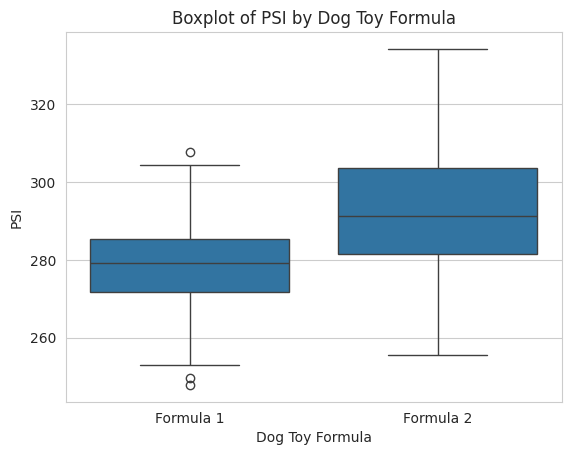

In [13]:
## Set a nice minimal style for plot ##

sns.set_style("whitegrid")

## Create boxplot using seaborn ##

sns.boxplot(x="Formulation",y="PSI",data=dog_toys)

## Add Title and Labels using matplotlib ##

plt.title("Boxplot of PSI by Dog Toy Formula", loc='center')
plt.xlabel("Dog Toy Formula")
plt.ylabel("PSI")



*   Thus we see that since there is very little overlap between the formula 1 and formula 2 toys, so it can be concluded that on average the formula 2 toys can withstand more PSI than formula 1 toys
*   **To interpret these results, we can see that Formulation 2 has about 20 more PSI, on average, compared to Formulation 1. Practically, this means that F2 toys can withstand 20 more PSI than can F1 toys. We can see this in the visualization considering that F2 and F1's boxes don't have substantial overlap. In context, this likely implies that the PSI F2 toys can withstand is statistically greater than the PSI F1 toys can withstand.**



# 4. Perform an appropriate inferential analysis (including the specification of H0 and H1 )

$$ H_0: \mu_{\text{PSI of Formula 1}} = \mu_{\text{PSI of Formula 2}} $$

$$ H_1: \mu_{\text{PSI of Formula 1}} \neq \mu_{\text{PSI of Formula 2}} $$

In [16]:
## Import statsmodels ##

import statsmodels.api as sm
from statsmodels.formula.api import ols

## Fit One-Way ANOVA Model ##

mod = ols("PSI ~ Formulation", data=dog_toys).fit()

## Get the ANOVA table ##

aov_tab = sm.stats.anova_lm(mod,typ=1)

print(aov_tab)

                df        sum_sq      mean_sq          F    PR(>F)
Formulation    1.0   5461.156841  5461.156841  25.278813  0.000002
Residual     118.0  25492.356292   216.036918        NaN       NaN


"So we can see here that $F(1, 118) = 25.28$
 with an associated p-value of $p < 0.001$
. This implies that the data more strongly support the alternative hypothesis. Contextually, this means that the mean difference we observed in the descriptive analysis is statistically meaningful. In other words, F2 toys are likely tougher toys and can withstand stronger bites from pets."

# 6. What questions remain?

"In this experiment, the dog toys were crushed to simulate a dog's bite force. However, dogs mostly have pointed canine teeth for piercing. This experiment didn't consider the effect of biting force in conjunction with teeth piercing. In other words, we know the F2 toys can withstand a strong bite but we don't know if they will easily rip when bit with a sharp tooth. This should be accounted for in a subsequent experiment."